# Penguin Cafe Orchestra insights with expert.ai

Let's build a small application to investigate one of my favourite artists. They are called "<a href='https://www.penguincafe.com/'>The Penguin Cafe Orchestra</a>" and if you don't know them you are going to find out what they are about, thanks to expert.ai NL API. <br>

<b>Our dataset</b>: a list of their album's reviews that I took from <a href='https://www.scaruffi.com/'>Piero Scaruffi</a>'s website and saved in a dedicated folder. <br>
<b>Our goal</b>: to understand more about an artist - using albums reviews. <br>
<b>Our practical goal</b>: to see how expert.ai NL API work and what they can do. 

## What is The Penguin Cafe Orchestra about?

First let's see what comes out from the reviews just analysing the words used in them. We'll firstly concatenate all the reviews in one variable, in order to have a whole artist's review. Then we are going to take a look at the most frequent words in them, hoping that it will reveal more on the Penguin Cafe Orchestra.

In [4]:
### Code for iterating on the artist's folder and concatenate albums's reviews in one single artist's review
import os

artist_review = ''
artist_path = 'penguin_cafe_orchestra'
albums =  os.listdir(artist_path)

for album in albums:
    album_path = os.path.join(artist_path, album)
    with open(album_path, 'r', encoding = 'utf8') as file:
        review = file.read()
        artist_review += review


print(albums)
print(artist_review)

['Broadcasting From Home.txt', 'Concert Program.txt', 'Music From the Penguin Cafe.txt', 'Signs of Life.txt']
Broadcasting From Home (EG, 1984), on the other hand, veers towards rural dances. Its pieces are inspired by the British folk, but Jeffes's stay in Japan inspired him to include mantra-like sequences, raga-like progressions and vibrating chimes (More Milk, Now Nothing) as well. The instrumentation is serious and majestic to such extent (more than ever) that now we can really talk about a little orchestra (with Geoff Richardson on the viola and the usual partners, Liebmann and Wright, completing the biggest string section in rock music), while Jeffes's ambitions are no less lofty. Music For A Found Harmonium is an overwhelming roundelay halfway between popular dances and Bach's chamber music. Even more baroque, the adagios of Prelude And Yodel, Sheep Dip and Isle Of View and the romantic sonata White Mischief further prove Orchestra’s tendencies of injecting the ethnic fusion wi

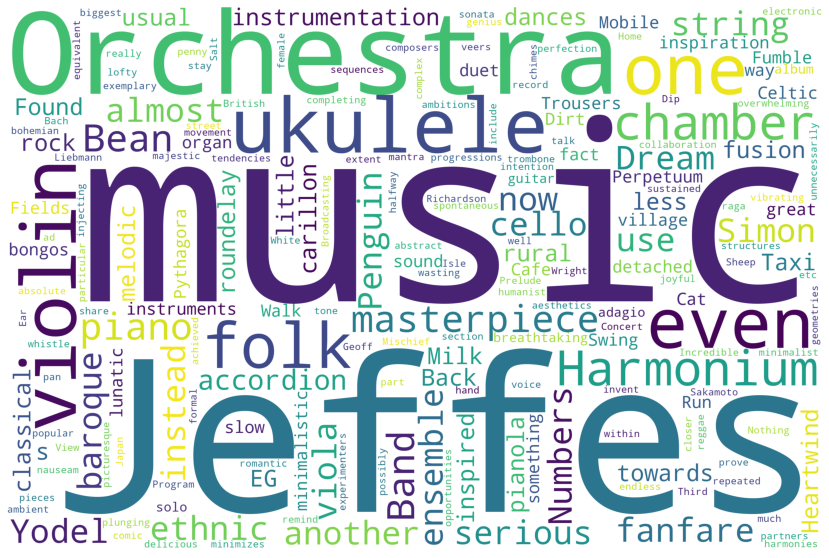

In [6]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(artist_review)
# Plot
plot_cloud(wordcloud)

## How does their music make you feel?

Thanks to the word cloud we know more about them: we know that they use instruments such as ukulele, piano, violin,.. and that they mix genres such as folk, ethnic, classical, ... <br>
Still, we have no idea of the style of the artist. We can know more by looking at what emotions come out of their work. <br>
To do so, we are going to use expert.ai NL API. Please register <a href='https://developer.expert.ai'>here</a>, find the documentation on the SDK <a href= 'https://github.com/therealexpertai/nlapi-python'>here</a> and on the features <a href='https://docs.expert.ai/nlapi/latest'>here</a>.

In [5]:
### Install the python SDK
!pip install expertai-nlapi

You should consider upgrading via the 'C:\Users\lgorrieri\Envs\demo\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached expertai_nlapi-2.3.1-py3-none-any.whl (96 kB)


In [1]:
import os
os.environ["EAI_USERNAME"] = 'your_username'
os.environ["EAI_PASSWORD"] = 'your_password'

In [8]:
## Code for initializing the client and then use the emotional-traits taxonomy
from expertai.nlapi.cloud.client import ExpertAiClient
client = ExpertAiClient()

emotions =[]
weights = []


output = client.classification(body={"document": {"text": artist_review}}, params={'taxonomy': 'emotional-traits', 'language': 'en'})

for category in output.categories:
    emotion = category.label
    weight = category.frequency
    emotions.append(emotion)
    weights.append(weight)


print(emotions)
print(weights)

['Happiness', 'Excitement', 'Joy', 'Amusement', 'Love']
[15.86, 31.73, 15.86, 31.73, 4.76]


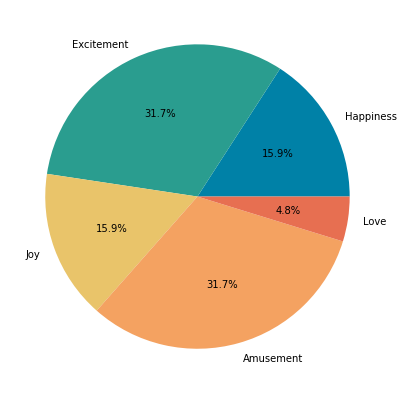

In [13]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
  
# Creating plot
colors = ['#0081a7','#2a9d8f','#e9c46a','#f4a261', '#e76f51']
fig = plt.figure(figsize =(10, 7))
plt.pie(weights, labels = emotions, colors=colors, autopct='%1.1f%%')
  
# show plot
plt.show()


## What's their best album?

If you wanted to start to listen to them, to see if you feel the same emotions Scaruffi's found in their work, where could you start? We can take a look at the sentiment analysis for each album and get an idea of their best ones. To do so, we iterate on each album's review and use expert.ai NL API to retrieve their sentiment and its strenght.

In [10]:
## Code for iterating on each album and retrieving the sentiment
sentiment_ratings = []
albums_names = [album[:-4] for album in albums]


for album in albums:
    album_path = os.path.join(artist_path, album)
    with open(album_path, 'r', encoding = 'utf8') as file:
        review = file.read()
        output = client.specific_resource_analysis(
            body={"document": {"text": review}}, 
            params={'language': 'en', 'resource': 'sentiment'
        })
        sentiment = output.sentiment.overall
        sentiment_ratings.append(sentiment)

print(albums_names)
print(sentiment_ratings)


['Broadcasting From Home', 'Concert Program', 'Music From the Penguin Cafe', 'Signs of Life']
[11.6, 2.7, 10.89, 3.9]


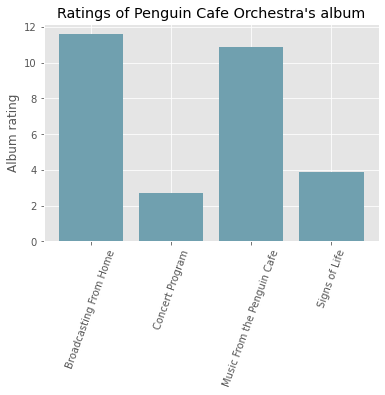

In [24]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

albums_names = [name[:-4] for name in albums]

plt.bar(albums_names, sentiment_ratings, color='#70A0AF')
plt.ylabel("Album rating")
plt.title("Ratings of Penguin Cafe Orchestra's album")

plt.xticks(albums_names, rotation=70)

plt.show()